In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2020-player-performance/IPL 2020 Squads.csv
/kaggle/input/ipl-2020-player-performance/sample_submission.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2020.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2008-2019.csv
/kaggle/input/ipl-2020-player-performance/Training.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_training = pd.read_csv("../input/ipl-2020-player-performance/Training.csv")
df_training.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86


In [4]:
ipl_2020 = pd.read_csv("../input/ipl-2020-player-performance/Matches IPL 2020.csv")
ipl_2020.head()

,match_id,city,date,team1,team2,venue,umpire1,umpire2,umpire3
0,1216492,Abu Dhabi,9/19/2020,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,Dubai (DSC),9/20/2020,DC,KXIP,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,Dubai (DSC),9/21/2020,SRH,RCB,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,Sharjah,9/22/2020,RR,CSK,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,Abu Dhabi,9/23/2020,KKR,MI,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [5]:
ipl_previous = pd.read_csv("../input/ipl-2020-player-performance/Matches IPL 2008-2019.csv")
ipl_previous.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
ipl_previous.shape

(756, 18)

In [7]:
ipl_previous.isna().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
ipl_previous.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

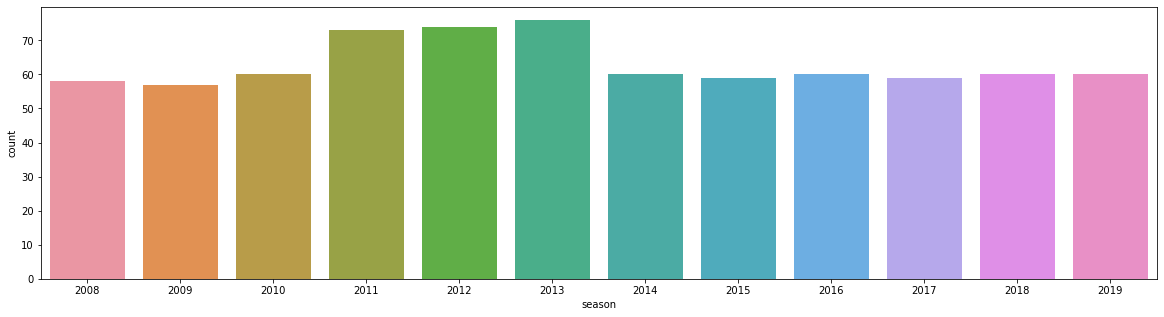

In [9]:
fig_dims=(20,5)
plt.subplots(figsize=fig_dims)
sns.countplot(x= ipl_previous['season'],data= ipl_previous)
plt.show()

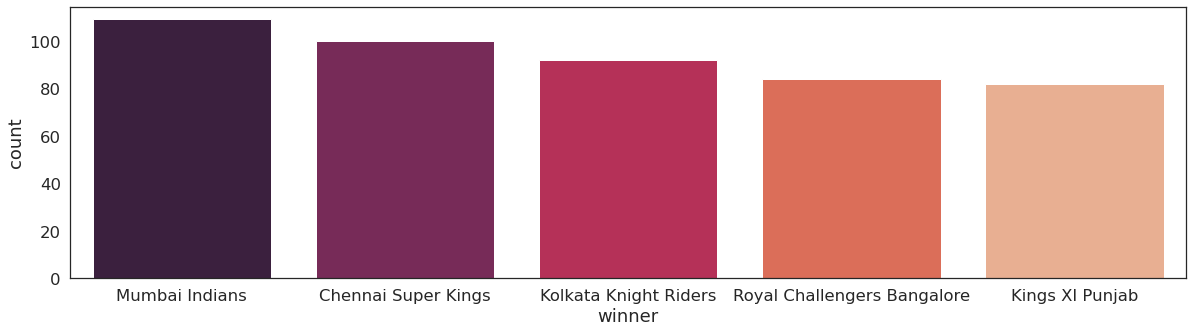

In [10]:
fig_dims=(20,5)
sns.set(font_scale=1.5)
sns.set_style("white")
plt.subplots(figsize=fig_dims)
sns.countplot(x=ipl_previous["winner"],palette="rocket", data= ipl_previous, order=ipl_previous.winner.value_counts().iloc[:5].index)
plt.show()

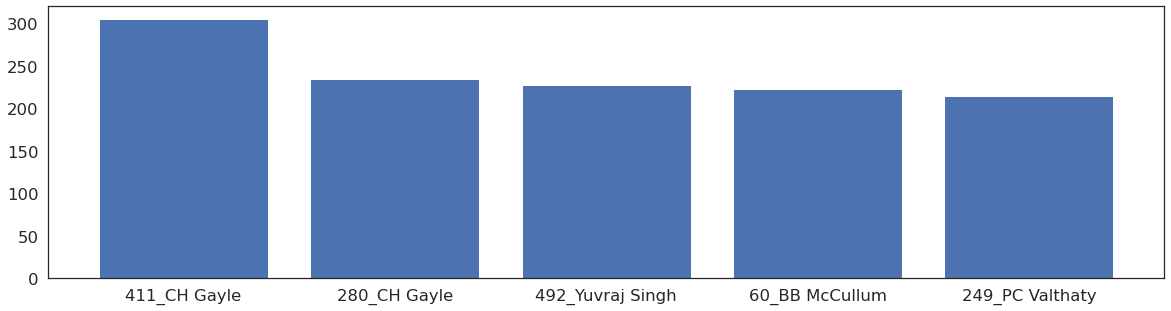

In [11]:
player_highestpoints = df_training.nlargest(5, ['Total Points'])
fig_dims=(20,5)
plt.subplots(figsize=fig_dims)
plt.bar(player_highestpoints['Id'], player_highestpoints['Total Points'])
plt.show()

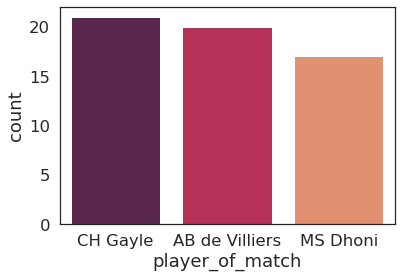

In [12]:
sns.countplot(x="player_of_match", data= ipl_previous, palette="rocket",order= ipl_previous.player_of_match.value_counts().iloc[:3].index)
plt.show()

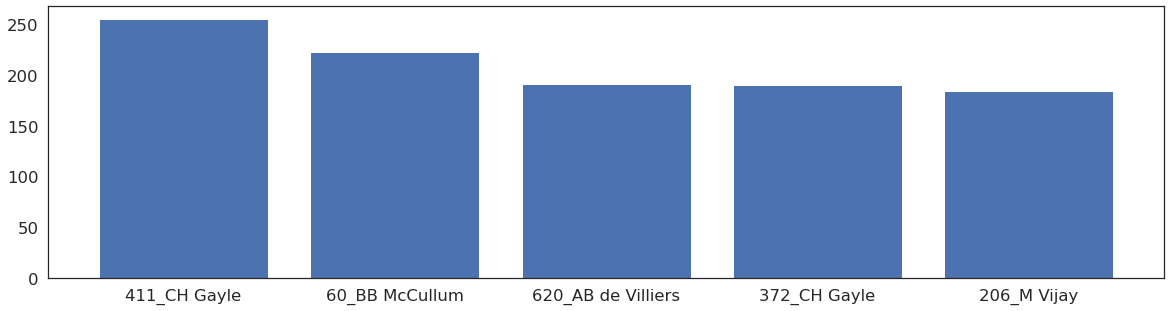

In [13]:
player_highestpoints = df_training.nlargest(5, ['Batting_Points'])
fig_dims=(20,5)
plt.subplots(figsize=fig_dims)
plt.bar(player_highestpoints['Id'], player_highestpoints['Batting_Points'])
plt.show()

In [14]:
df_training

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52


In [15]:
players = pd.read_csv("../input/ipl-2020-player-performance/IPL 2020 Squads.csv",encoding ="unicode_escape")
players

,player_ipl_id,Player_name,Player_country,Player_ipl_team
0,CSK1,MS Dhoni (C),India,CSK
1,CSK2,Suresh Raina,India,CSK
2,CSK3,Kedar Jadhav,India,CSK
3,CSK4,Ravindra Jadeja,India,CSK
4,CSK5,Dwayne Bravo,West Indies,CSK
...,...,...,...,...
122,SRH13,Shreevats Goswami,India,SRH
123,SRH14,Basil Thampi,India,SRH
124,SRH15,Abhishek Sharma,India,SRH
125,SRH16,Billy Stanlake,Australia,SRH


In [16]:
df_training.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86


In [17]:
df_training['players'] = df_training['Id']
df_training['number'] =  df_training['Id']
for i in range(0, len( df_training)):
    df_training['players'][i] =  df_training['Id'][i].split("_")[-1]
    df_training['number'][i] = int( df_training['Id'][i].split('_')[:1][0])

Clean Id column to extract player's name and create a seprate column for the number of match of that player.

In [18]:
df_training.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,players,number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh,1


In [19]:
df_training['players'].value_counts()

SK Raina            189
RG Sharma           183
RV Uthappa          170
MS Dhoni            170
V Kohli             170
                   ... 
Mashrafe Mortaza      1
P R Barman            1
DM Bravo              1
GR Napier             1
Abdur Razzak          1
Name: players, Length: 559, dtype: int64

In [20]:
df_training.number = df_training.number.astype(int)
df_training.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,players,number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh,1


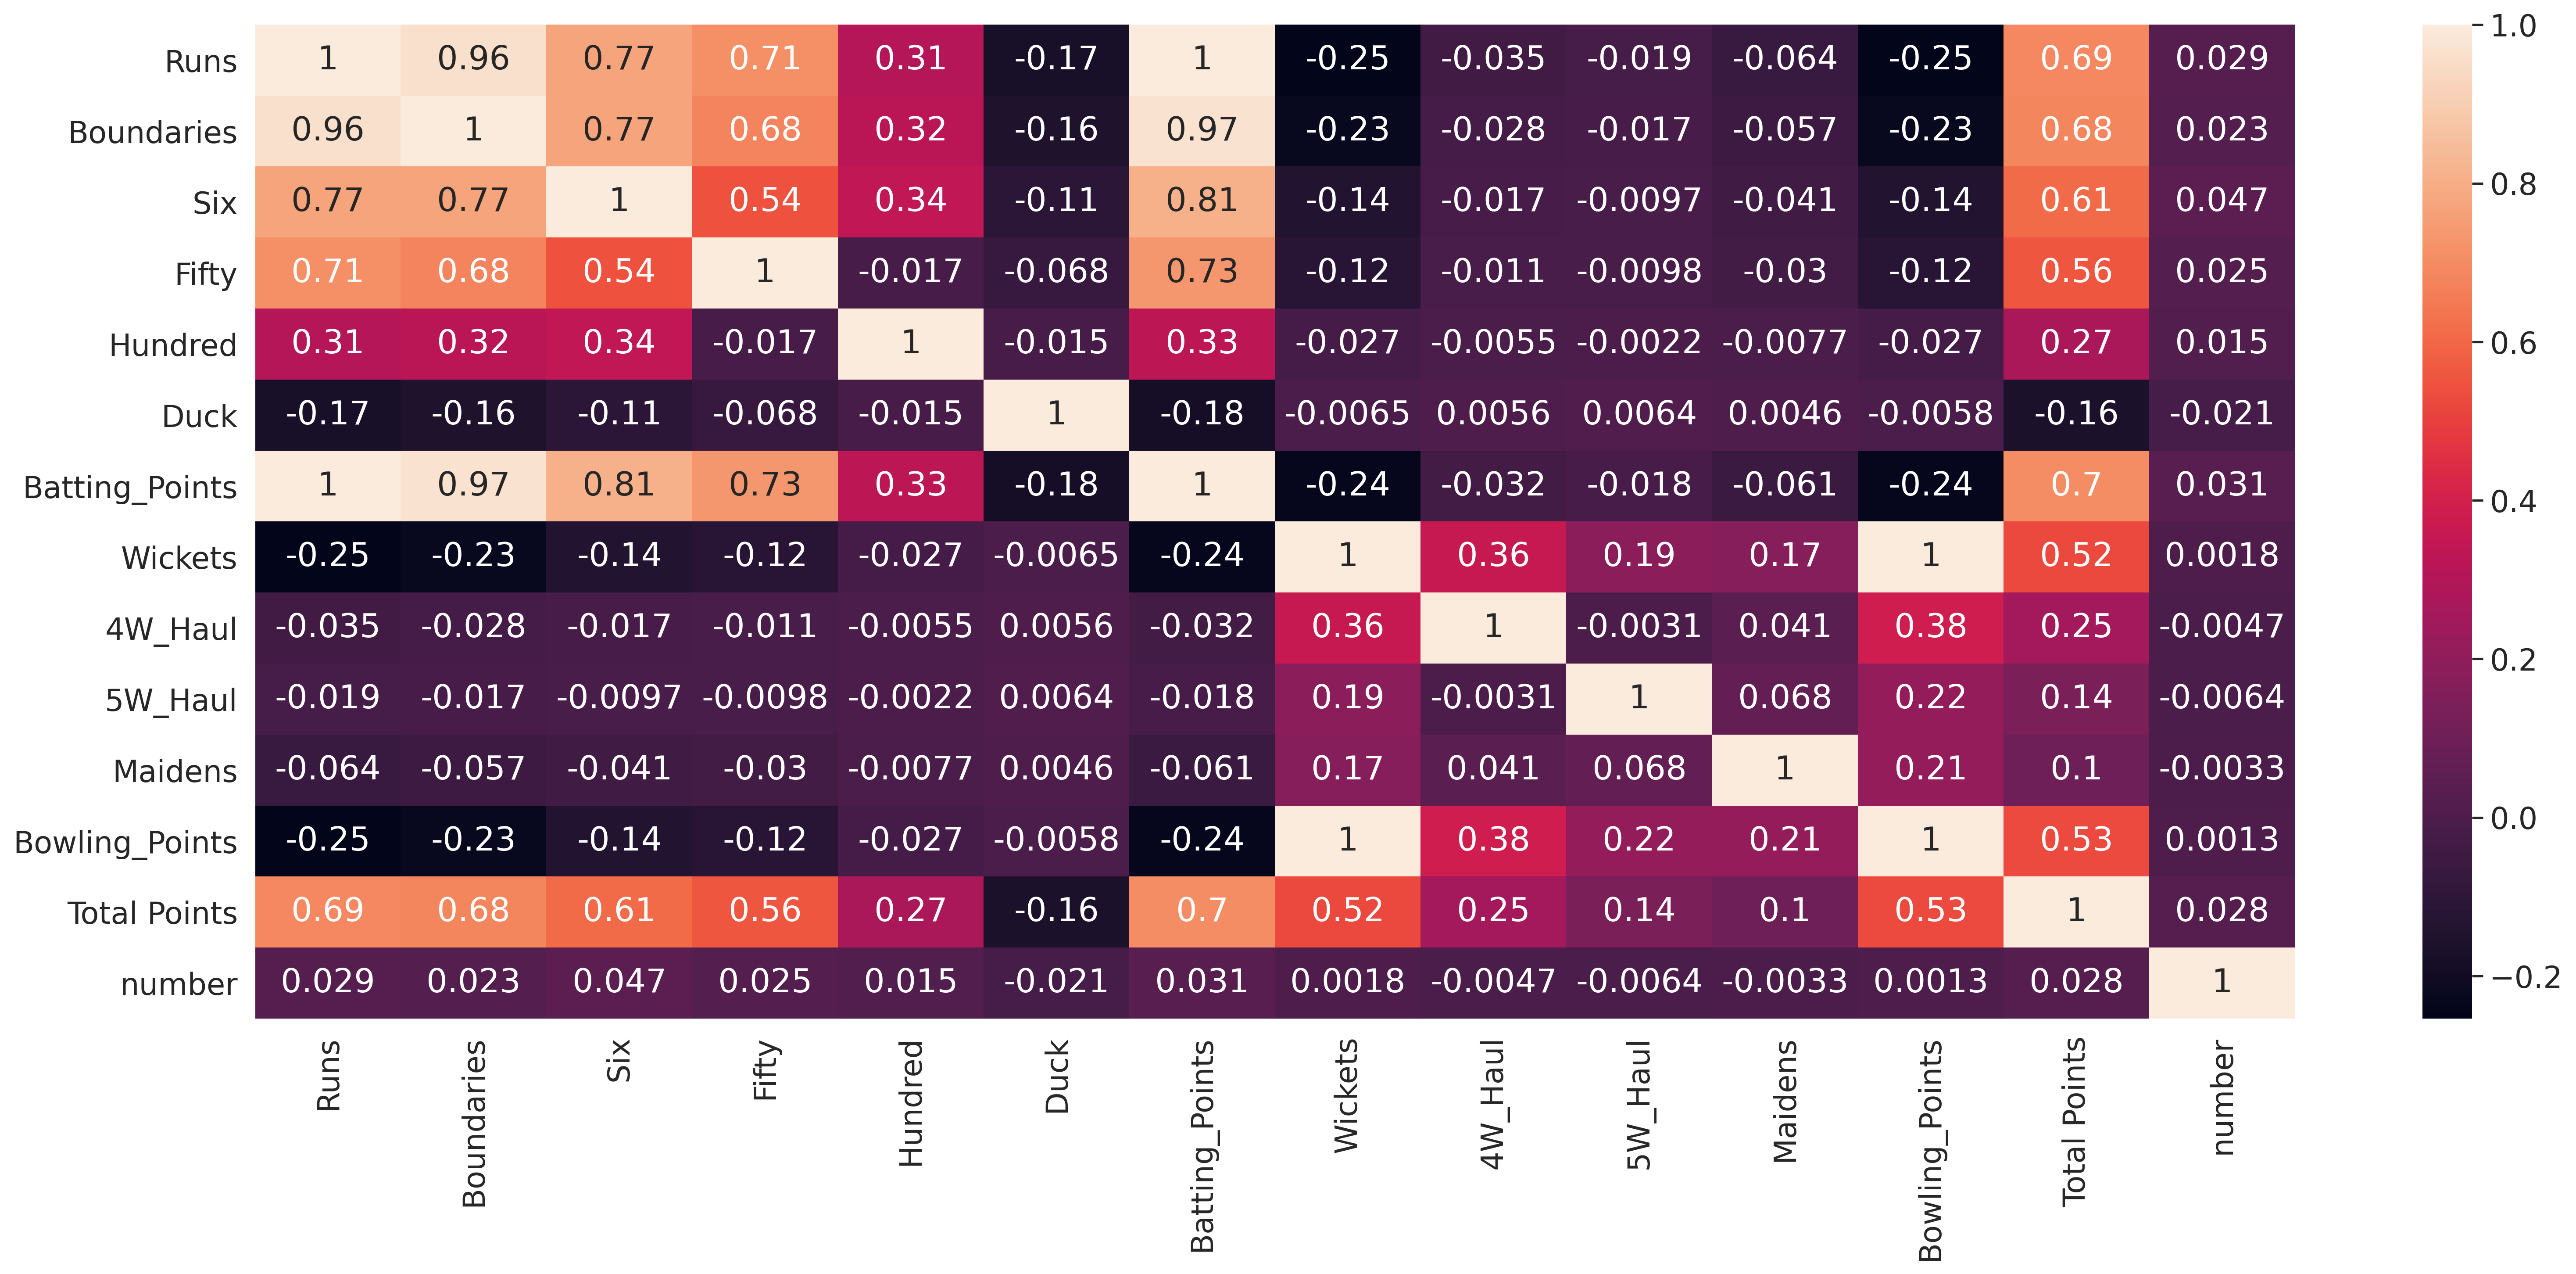

In [21]:
plt.figure(figsize=(25,10),dpi=300)
sns.heatmap(df_training.corr(),annot =True)
plt.show()

In [22]:
df = pd.DataFrame()
df['match_number'] = df_training['number']
df['players'] = df_training['players']
df['total_score'] = df_training['Total Points']
df['Id']    = df_training['Id']
df.head()

,match_number,players,total_score,Id
0,1,Bipul Sharma,25,1_Bipul Sharma
1,1,DJ Hooda,44,1_DJ Hooda
2,1,KM Jadhav,38,1_KM Jadhav
3,1,Mandeep Singh,29,1_Mandeep Singh
4,1,Yuvraj Singh,86,1_Yuvraj Singh


In [23]:
df.groupby(['players','match_number']).sum()

total_score
players        match_number             
A Ashish Reddy 331                     0
               341                    50
               346                    38
               348                    25
               352                    28
...                                  ...
Z Khan         612                    25
               623                    27
               625                     0
               628                     0
               632                    25

[15916 rows x 1 columns]

In [24]:
df['players'].value_counts()

SK Raina            189
RG Sharma           183
RV Uthappa          170
MS Dhoni            170
V Kohli             170
                   ... 
Mashrafe Mortaza      1
P R Barman            1
DM Bravo              1
GR Napier             1
Abdur Razzak          1
Name: players, Length: 559, dtype: int64

In [25]:
df = df.drop(['players'],axis = 1)

In [26]:
df = df.iloc[:1283]
df.shape

(1283, 3)

In [27]:
df.match_number=  df.match_number.astype(int)
d =df.select_dtypes(include='object')
n = df.select_dtypes(exclude='object')
d.columns

Index(['Id'], dtype='object')

In [28]:
d = pd.get_dummies(d,drop_first=True)

In [29]:
df = pd.concat([d,n],axis = 1)

In [30]:
df.head()

,Id_10_B Kumar,Id_10_BCJ Cutting,Id_10_DA Warner,Id_10_DJ Hooda,Id_10_HH Pandya,Id_10_Harbhajan Singh,Id_10_JC Buttler,Id_10_JJ Bumrah,Id_10_KA Pollard,Id_10_KH Pandya,...,Id_9_PJ Cummins,Id_9_R Bhatia,Id_9_RA Tripathi,Id_9_RR Pant,Id_9_S Nadeem,Id_9_SV Samson,Id_9_SW Billings,Id_9_Z Khan,match_number,total_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,44
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,38
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,86


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [32]:
X= df.drop(['total_score'],axis=1)
y= df.total_score

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
y_pred = np.round(y_pred)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29.94393028710428

In [38]:
df_sample = pd.read_csv('../input/ipl-2020-player-performance/sample_submission.csv')

In [39]:
df_sample

,Id,Total Points
0,1216492_AS Yadav,0
1,1216492_AT Rayudu,0
2,1216492_DL Chahar,0
3,1216492_F du Plessis,0
4,1216492_HH Pandya,0
...,...,...
1278,1237181_S Hetmyer,0
1279,1237181_SA Yadav,0
1280,1237181_SS Iyer,0
1281,1237181_SS Tiwary,0


In [40]:
df_sample['players'] = df_sample['Id']
df_sample['number'] =  df_sample['Id']
for i in range(0, len(df_sample)):
    df_sample['players'][i] =  df_sample['Id'][i].split("_")[-1]
    df_sample['number'][i] = int( df_sample['Id'][i].split('_')[:1][0])
df_sample

,Id,Total Points,players,number
0,1216492_AS Yadav,0,AS Yadav,1216492
1,1216492_AT Rayudu,0,AT Rayudu,1216492
2,1216492_DL Chahar,0,DL Chahar,1216492
3,1216492_F du Plessis,0,F du Plessis,1216492
4,1216492_HH Pandya,0,HH Pandya,1216492
...,...,...,...,...
1278,1237181_S Hetmyer,0,S Hetmyer,1237181
1279,1237181_SA Yadav,0,SA Yadav,1237181
1280,1237181_SS Iyer,0,SS Iyer,1237181
1281,1237181_SS Tiwary,0,SS Tiwary,1237181


In [41]:
total_points = df_sample.drop(['Total Points','players'],axis=1)
total_points.number = total_points.number.astype(int)
total_points.number.dtypes
t = total_points.select_dtypes(include='object') 
p = total_points.select_dtypes(exclude='object')

t.columns
t= pd.get_dummies(t,drop_first=True)
t.columns

Index(['Id_1216492_AT Rayudu', 'Id_1216492_DL Chahar',
       'Id_1216492_F du Plessis', 'Id_1216492_HH Pandya',
       'Id_1216492_JJ Bumrah', 'Id_1216492_JL Pattinson',
       'Id_1216492_KA Pollard', 'Id_1216492_KH Pandya', 'Id_1216492_L Ngidi',
       'Id_1216492_M Vijay',
       ...
       'Id_1237181_Q de Kock', 'Id_1237181_R Ashwin', 'Id_1237181_RG Sharma',
       'Id_1237181_RR Pant', 'Id_1237181_S Dhawan', 'Id_1237181_S Hetmyer',
       'Id_1237181_SA Yadav', 'Id_1237181_SS Iyer', 'Id_1237181_SS Tiwary',
       'Id_1237181_TA Boult'],
      dtype='object', length=1282)

In [42]:
total_points = pd.concat([t,p],axis=1)

total_points.head()

,Id_1216492_AT Rayudu,Id_1216492_DL Chahar,Id_1216492_F du Plessis,Id_1216492_HH Pandya,Id_1216492_JJ Bumrah,Id_1216492_JL Pattinson,Id_1216492_KA Pollard,Id_1216492_KH Pandya,Id_1216492_L Ngidi,Id_1216492_M Vijay,...,Id_1237181_R Ashwin,Id_1237181_RG Sharma,Id_1237181_RR Pant,Id_1237181_S Dhawan,Id_1237181_S Hetmyer,Id_1237181_SA Yadav,Id_1237181_SS Iyer,Id_1237181_SS Tiwary,Id_1237181_TA Boult,number
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1216492
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1216492
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1216492
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1216492
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1216492


In [43]:
scaler.fit(total_points)
total_points = scaler.transform(total_points)
yp_pred = model.predict(total_points)
yp_pred = np.round(yp_pred)

In [44]:
yp_pred  = [0 if i<0 else i for i in yp_pred]

In [45]:
df_sample['Total Points'] = yp_pred
df_sample = df_sample.drop(['players','number'],axis = 1)
df_sample.head()

,Id,Total Points
0,1216492_AS Yadav,27.0
1,1216492_AT Rayudu,92.0
2,1216492_DL Chahar,26.0
3,1216492_F du Plessis,72.0
4,1216492_HH Pandya,39.0


In [46]:
df_sample.to_csv('IPL_Players_Performance',index = False)

In [47]:
Forecast = pd.read_csv("./IPL_Players_Performance")
Forecast.tail(20)

,Id,Total Points
1263,1237181_HH Pandya,42.0
1264,1237181_HV Patel,15.0
1265,1237181_Ishan Kishan,17.0
1266,1237181_JJ Bumrah,3.0
1267,1237181_K Rabada,35.0
1268,1237181_KA Pollard,96.0
1269,1237181_KH Pandya,7.0
1270,1237181_MP Stoinis,59.0
1271,1237181_NM Coulter-Nile,16.0
1272,1237181_Praveen Dubey,35.0
